## Certified AI Practitioner Week 01 Call 02 - How Good Is Your Model?

## Learning Objectives

- Explain key model evaluation metrics: accuracy, precision, recall, and F1 score
- Interpret a confusion matrix
- Understand why accuracy alone can be misleading
- Relate evaluation metrics to real-world decision-making
- Use scikit-learn to compute and visualize metrics from a model

## What is Kaggle?

[Kaggle](https://www.kaggle.com/) is an online platform for data science competitions, learning, and collaboration.  
It offers real-world datasets, tutorials, and challenges that help you build and test machine learning skills in a hands-on way.

The [Titanic dataset](https://www.kaggle.com/c/titanic/overview) is one of the most popular beginner datasets on Kaggle.  
It’s based on the **1912 sinking of the Titanic**, where the goal is to predict whether a passenger survived, using information like:

- **Age**
- **Sex**
- **Passenger class**
- **Family onboard**
- **Fare paid**
- **Port of embarkation**

## Problem Setup

We will treat this as a **binary classification problem**:
- `0` = Did not survive
- `1` = Survived

This dataset is **imperfect and slightly imbalanced**, making it great for learning about:
- Why accuracy can be misleading
- How to use metrics like precision and recall
- How to interpret a confusion matrix

## Load and Preview the Titanic Dataset

Let's load the Titanic dataset and take a quick look at the structure.

In [3]:
import pandas as pd

# Load Titanic training dataset from local CSV
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df = pd.concat([df_train, df_test]).reset_index(drop=True)

# Preview the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check column names and data types
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Clean and Prepare the Titanic Data

To keep things simple, we will:
- Use a small number of helpful features
- Handle missing values in `Age` and `Embarked`
- Convert text columns like `Sex` and `Embarked` to numbers


In [5]:
# Select useful columns for this example
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df = df[cols]

# Drop rows with missing values (for now, keep it simple)
df = df.dropna()

# Encode 'Sex' as 0 = male, 1 = female
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Encode 'Embarked' as 0 = S, 1 = C, 2 = Q
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Final preview of the cleaned dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,0
1,1.0,1,1,38.0,1,0,71.2833,1
2,1.0,3,1,26.0,0,0,7.9250,0
3,1.0,1,1,35.0,1,0,53.1000,0
4,0.0,3,0,35.0,0,0,8.0500,0


## Prepare the Data for Modeling

We’ll now:
- Separate features (`X`) and target (`y`)
- Split into training and testing sets
- Scale numeric features to help the model perform better


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (helps many ML models work better)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train a Decision Tree Model

We'll start with a simple Decision Tree to:
- See how a basic model performs
- Interpret its decisions visually


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Evaluate the Decision Tree

We'll now:
- Make predictions on the test set
- Calculate key evaluation metrics
- Visualize the confusion matrix


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test_scaled)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.7202797202797203
Precision: 0.7017543859649122
Recall: 0.6349206349206349
F1 Score: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        80
         1.0       0.70      0.63      0.67        63

    accuracy                           0.72       143
   macro avg       0.72      0.71      0.71       143
weighted avg       0.72      0.72      0.72       143



## Understanding Classification Metrics

After training a model, we use evaluation metrics to understand how well it's performing — especially on **binary classification** tasks like predicting survival.

---

### Accuracy
- The **overall percentage** of correct predictions.
- Useful when classes are balanced — but can be **misleading** if one class dominates.

---

### Precision
- Of all the passengers the model **predicted as survived**, how many **actually survived**?
- Helps reduce **false positives**.
- Important when predicting something **positive but rare** (e.g., fraud, disease, survival).

---

### Recall
- Of all passengers who **actually survived**, how many did the model **correctly identify**?
- Helps reduce **false negatives**.
- Important when **missing a positive case** would be costly or dangerous.

---

### F1 Score
- The **harmonic mean** of precision and recall.
- A balanced metric when both false positives and false negatives matter.
- Especially helpful in **imbalanced datasets**.

---

### Classification Report Breakdown

| Term             | Meaning                                                                 |
|------------------|-------------------------------------------------------------------------|
| `precision`      | How many predicted positives were actually correct                      |
| `recall`         | How many actual positives were correctly identified                     |
| `f1-score`       | Balance between precision and recall                                    |
| `support`        | The number of actual samples in each class                              |
| `accuracy`       | Overall % of correct predictions (both classes combined)                |
| `macro avg`      | Unweighted average of metrics across both classes                       |
| `weighted avg`   | Average of metrics **weighted by support** (accounts for class imbalance) |

---

### Example:
- **Class 0** = Did not survive  
- **Class 1** = Survived  
- If `recall` is low for Class 1, the model is **missing survivors**, which could be critical in real-life decision-making.


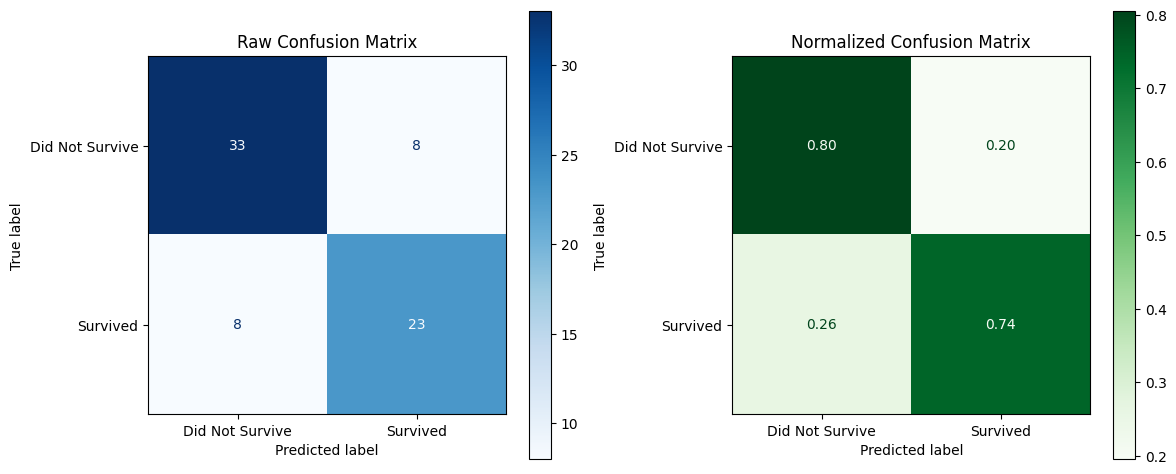

In [24]:
# Compute confusion matrix (raw counts)
cm = confusion_matrix(y_test, y_pred_dt)

# Compute normalized confusion matrix (proportions per actual class)
cm_normalized = confusion_matrix(y_test, y_pred_dt, normalize='true')

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw confusion matrix
ConfusionMatrixDisplay(cm, display_labels=["Did Not Survive", "Survived"]).plot(
    ax=axes[0], cmap="Blues", values_format='d'
)
axes[0].set_title("Raw Confusion Matrix")

# Normalized confusion matrix
ConfusionMatrixDisplay(cm_normalized, display_labels=["Did Not Survive", "Survived"]).plot(
    ax=axes[1], cmap="Greens", values_format='.2f'
)
axes[1].set_title("Normalized Confusion Matrix")

plt.tight_layout()
plt.show()

## Understanding the Confusion Matrix

A **confusion matrix** is a table that shows how well our classification model performed.  
It compares the model’s predictions to the actual outcomes.

---

### Raw Confusion Matrix

This version shows the **actual number of predictions** in each category.

|                        | Predicted: No | Predicted: Yes |
|------------------------|----------------|-----------------|
| **Actual: No**         | True Negative  | False Positive  |
| **Actual: Yes**        | False Negative | True Positive   |

- **True Negative (TN)**: Model predicted **No**, and it was actually **No**
- **True Positive (TP)**: Model predicted **Yes**, and it was actually **Yes**
- **False Positive (FP)**: Model predicted **Yes**, but it was actually **No**  
  > Example: predicted someone survived when they didn’t
- **False Negative (FN)**: Model predicted **No**, but it was actually **Yes**  
  > Example: predicted someone did not survive, but they actually did

---

### Normalized Confusion Matrix

A **normalized matrix** shows the **proportion of correct/incorrect predictions** for each actual class.

Each row sums to 1, and each cell represents a **percentage of true class predictions**.

- Helps us see **recall** per class:
  - For class 1, how many were correctly identified?
  - For class 0, how many were misclassified?

---

### Why Both Are Useful

- The **raw matrix** helps us understand volume: "How many people were misclassified?"
- The **normalized matrix** helps us compare model behavior across classes:  
  "How well did the model do *per group*?"

---

### Business Example (Titanic)
- **False Positives (FP)** = Predicting someone survived who didn't → may create **false confidence**
- **False Negatives (FN)** = Predicting someone died who actually survived → may **hide success**
- Which is worse depends on the context — that's why understanding **precision and recall** matters.


## Visualize the Decision Tree

This helps us understand how the model makes decisions.


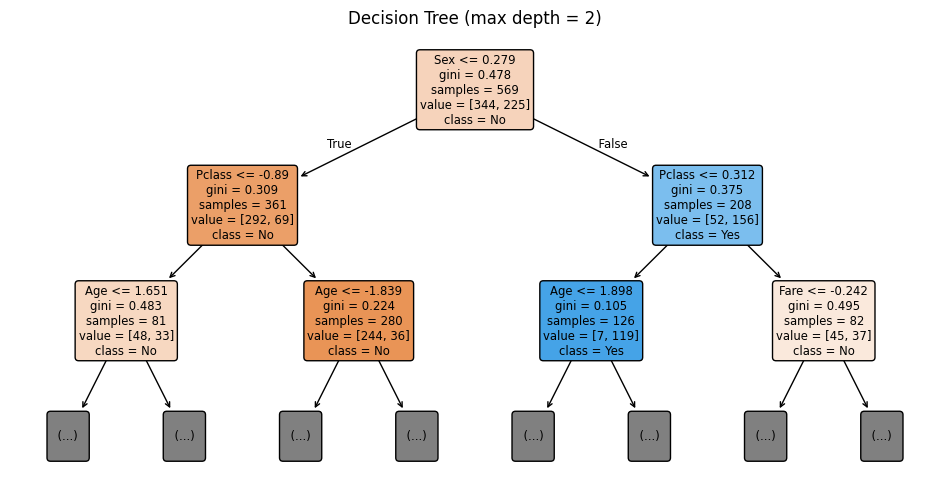

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"],
          filled=True, rounded=True, max_depth=2)
plt.title("Decision Tree (max depth = 2)")
plt.show()


## Interpreting the Decision Tree (Depth = 2)

- The tree makes decisions by splitting the data based on the most informative features.
- The first split separates the population into two broad groups with different survival patterns.
- Each additional split adds more context and refining the prediction based on subgroup characteristics.
- The leaf nodes show the model’s final decision based on the majority class in that group.
- Darker colors indicate more confident predictions (i.e., lower impurity).

This visualization helps us see how the model learns simple rules from the data to make predictions.


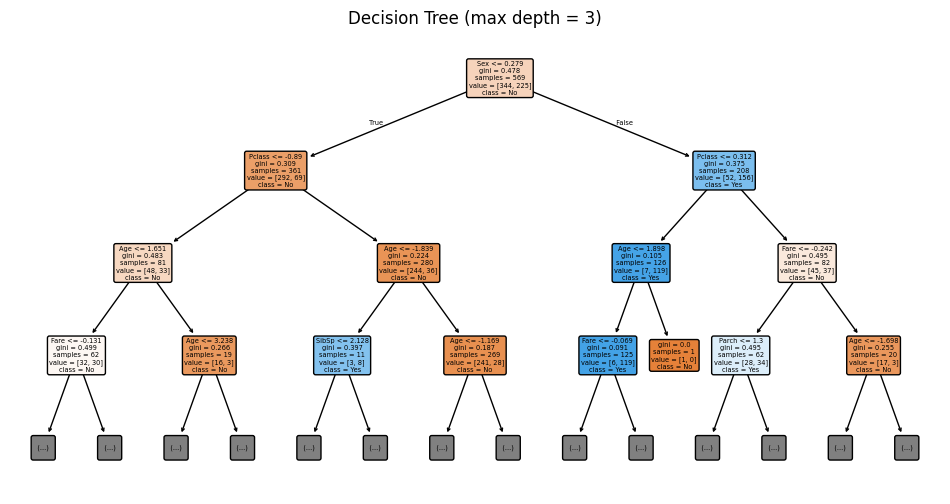

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"],
          filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (max depth = 3)")
plt.show()


## Train a Random Forest Model

Random Forest = many decision trees working together (ensemble).
- Typically performs better
- Less likely to overfit


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluate the Random Forest

Let’s compare performance with our earlier model.


In [12]:
y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Raw confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Normalized confusion matrix (by true labels — rows sum to 1)
cm_rf_norm = confusion_matrix(y_test, y_pred_rf, normalize="true")


Accuracy: 0.7832167832167832
Precision: 0.7666666666666667
Recall: 0.7301587301587301
F1 Score: 0.7479674796747967

Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        80
         1.0       0.77      0.73      0.75        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143



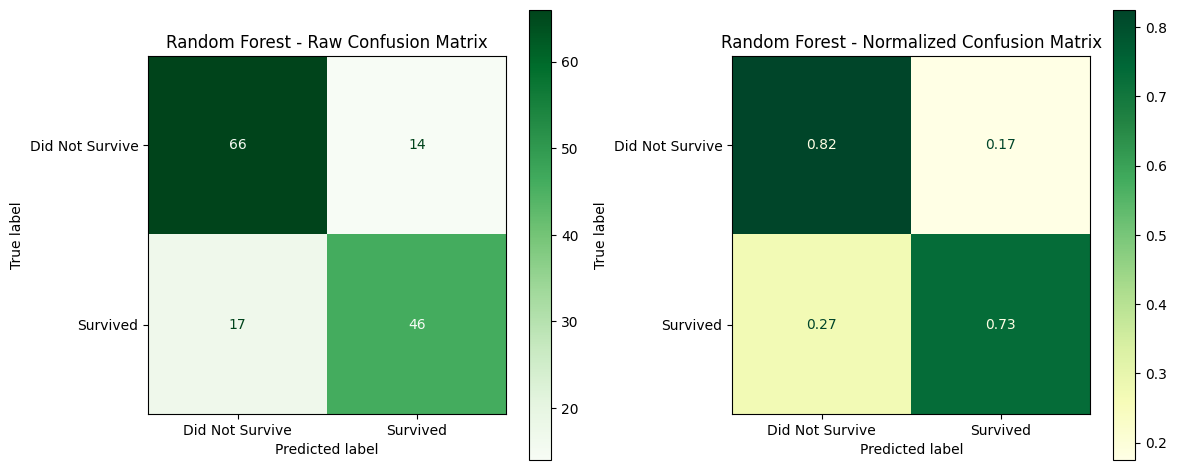

In [13]:


# Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Did Not Survive", "Survived"]).plot(
    ax=axes[0], cmap="Greens", values_format='d'
)
axes[0].set_title("Random Forest - Raw Confusion Matrix")

# Normalized
ConfusionMatrixDisplay(confusion_matrix=cm_rf_norm, display_labels=["Did Not Survive", "Survived"]).plot(
    ax=axes[1], cmap="YlGn", values_format='.2f'
)
axes[1].set_title("Random Forest - Normalized Confusion Matrix")

plt.tight_layout()
plt.show()

## Metrics in the Real World: Gun Detection on Facebook Marketplace

In our example, we’re using machine learning to predict whether a post on Facebook Marketplace contains a **gun listing** that should be removed.

This is a **binary classification** problem:
- `1` = Gun detected (remove the post)
- `0` = No gun (safe to keep)

Let’s break down what each metric tells us — and how it affects real decisions:

---

### Metric Meanings in Context

| Metric     | Real-World Meaning                                                  | Risk of Optimizing Alone            |
|------------|---------------------------------------------------------------------|-------------------------------------|
| **Accuracy**   | % of correct decisions (keep/remove) overall                        | May look good even if guns slip through |
| **Precision**  | Of all flagged posts, how many actually contain guns?              | High precision = fewer false removals |
| **Recall**     | Of all real gun listings, how many did we catch?                   | High recall = fewer guns slip through |
| **F1 Score**   | Balances catching guns **and** not removing safe posts             | Useful when both errors matter       |

---

### Mistakes Have Real Consequences:

| Error Type       | What Happens                                                 |
|------------------|--------------------------------------------------------------|
| **False Positive (FP)** | We flag/remove a non-gun item (hurts user trust)            |
| **False Negative (FN)** | We miss a real gun listing (major policy + safety risk)     |

---

### So Which Metric Matters Most?

- If your **goal is safety and compliance**, **recall** is crucial — better to review too many than let guns through.
- If your **goal is avoiding user complaints**, **precision** becomes more important — avoid flagging innocent items.
- Most platforms balance both with the **F1 Score**, and fine-tune thresholds based on business risk.

---

### Key Question for Every ML System:
> “Which mistake is worse — a false positive or a false negative?”

In this case: **missing a gun (false negative)** is usually worse.



## Wrap-Up & Takeaways 

- Accuracy is not always enough
- Precision and recall help us understand **types of mistakes**
- F1 score balances both
- Confusion matrix shows *what* went wrong
- In the real world, different metrics matter depending on the **problem**